# Explore here

In [17]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')


In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
#eda

In [20]:
df_eda = df[['age','duration','campaign','pdays','emp.var.rate','y']]
df_eda

,age,duration,campaign,pdays,emp.var.rate,y
0,56,261,1,999,1.1,no
1,57,149,1,999,1.1,no
2,37,226,1,999,1.1,no
3,40,151,1,999,1.1,no
4,56,307,1,999,1.1,no
...,...,...,...,...,...,...
41183,73,334,1,999,-1.1,yes
41184,46,383,1,999,-1.1,no
41185,56,189,2,999,-1.1,no
41186,44,442,1,999,-1.1,yes


In [21]:
df_eda['y'] = pd.factorize(df_eda['y'])[0]

/tmp/ipykernel_5533/3640873288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['y'] = pd.factorize(df_eda['y'])[0]


In [22]:
df_eda.head()

,age,duration,campaign,pdays,emp.var.rate,y
0,56,261,1,999,1.1,0
1,57,149,1,999,1.1,0
2,37,226,1,999,1.1,0
3,40,151,1,999,1.1,0
4,56,307,1,999,1.1,0


In [23]:
X = df_eda.drop(['y'],axis=1)
y = df_eda['y']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9045884923525127

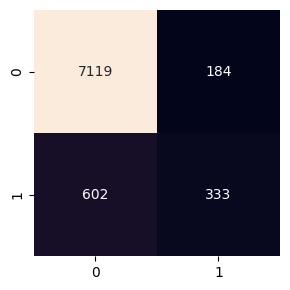

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

score_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(score_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [33]:
tasa_conversion_antes = (333+184)/(7119+602+184+333)
tasa_conversion_antes

0.06275795095897062

In [34]:
tasa_conversion_modelo = 333/(333+184)
tasa_conversion_modelo

0.6441005802707931

In [35]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [36]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


In [37]:
best_model = grid.best_estimator_

In [38]:
y_b_pred = best_model.predict(X_test)
accuracy_score(y_test,y_b_pred)

0.9039815489196407

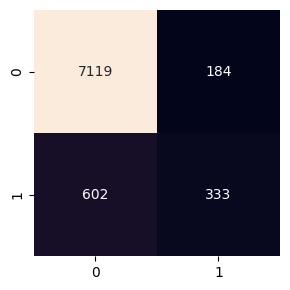

In [39]:
cm = confusion_matrix(y_test, y_b_pred)

cm_df = pd.DataFrame(score_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()